In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import statsmodels.api as sm

import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

%matplotlib inline

In [3]:
ndata = pd.read_csv('nflx_data.csv')

In [4]:
ndata.head()

,date,4. close,2. high,1. open,3. low,5. volume
0,2002-05-22,15.00,15.00,15.00,15.00,0.0
1,2002-05-23,16.75,17.40,16.19,16.04,7485000.0
2,2002-05-24,16.94,17.15,17.00,16.76,793200.0
3,2002-05-28,16.20,17.25,16.99,16.20,472100.0
4,2002-05-29,15.45,16.30,16.30,15.20,482700.0


In [6]:
cols = ['2. high','1. open','3. low','5. volume']
ndata.drop(cols,inplace=True,axis=1)

In [7]:
from datetime import datetime

def convert(x):
    return datetime.strptime(x,"%Y-%m-%d")


ndata['date'] = ndata['date'].apply(convert)

In [9]:
ndata.head()
ndata.rename(mapper={"4. close":"close"},axis=1,inplace=True)

In [10]:
ndata = ndata.set_index('date')
ndata.index

DatetimeIndex(['2002-05-22', '2002-05-23', '2002-05-24', '2002-05-28',
               '2002-05-29', '2002-05-30', '2002-05-31', '2002-06-03',
               '2002-06-04', '2002-06-05',
               ...
               '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-19',
               '2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23',
               '2019-08-26', '2019-08-27'],
              dtype='datetime64[ns]', name='date', length=4347, freq=None)

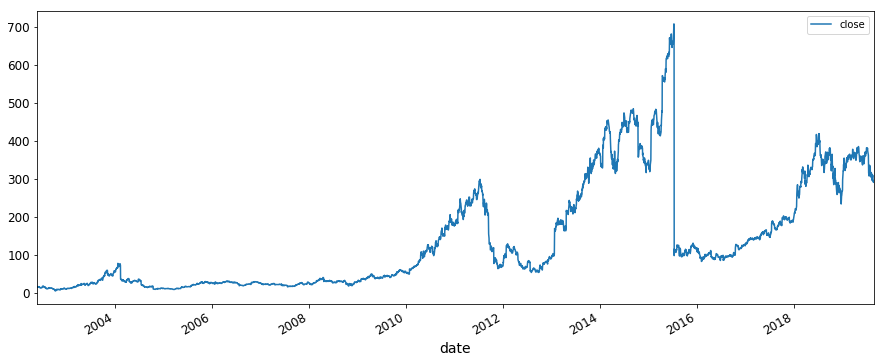

In [12]:
ndata.plot(figsize=(15, 6))

In [14]:
ndata = ndata.asfreq('D')

In [16]:
ndata.shape

(6307, 1)

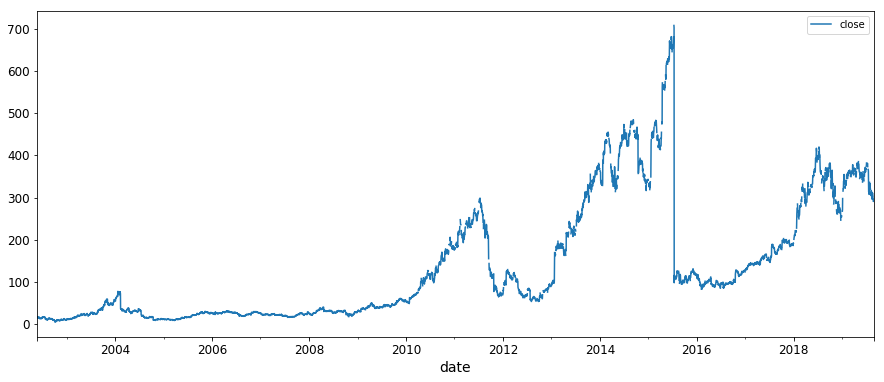

In [17]:
ndata.plot(figsize=(15, 6))

In [18]:
# linear interpolation
ndata['close'] = ndata['close'].interpolate()

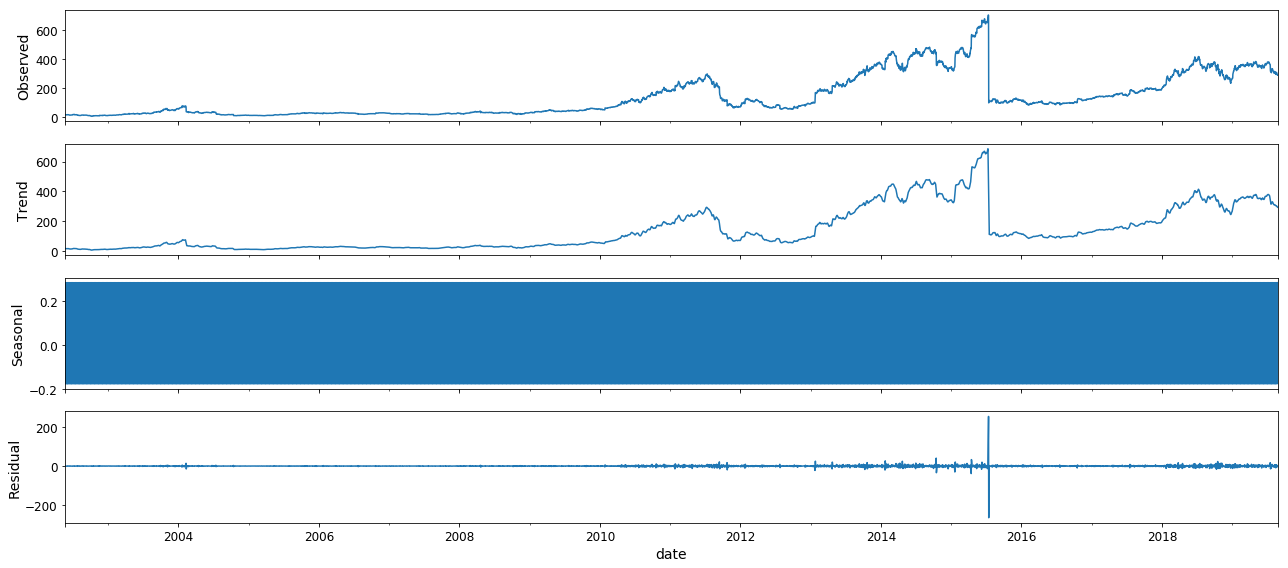

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ndata, model='additive')
fig = decomposition.plot()
plt.show()

In [21]:
import itertools
p = q = d = range(2)
pqd = list(itertools.product(p,q,d))
seasonal_pqd = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [22]:
for param in pqd:
    for sea_param in seasonal_pqd:
        try:
            model = sm.tsa.statespace.SARIMAX(ndata,order=param,seasonal_order=sea_param,enforce_invertibility=False,
                                      enforce_stationarity=False)
            res = model.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, sea_param, res.aic))
        except:
            continue

/home/sukhad/env/lib/python3.5/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:84596.07690655433
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:77027.52010949512
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:60531.76308493578
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:60430.14881504368


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:60519.28775580481
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:60512.71825864016
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:60438.76976848212
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:60432.123238206266
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:76236.00631411484
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:69160.40031353876
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:55008.400501921766
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:54818.42956925288
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:54992.094260110905


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:55143.69003215869
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:54836.909327493806
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:54820.42588863183
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:45138.66655901237
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:45066.72458005041
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:49432.68796515083
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:45044.704564086554
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:45072.885683753695
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:45068.724382093686
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:47583.25129565006
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:45046.69426107097
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:45134.26863465103
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:45062.323030541105
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:49427.677336694105
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:45040.30398661746
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:45074.64715858082
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:45064.32283780299
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:47584.98256098855
ARIM

In [23]:
mod = sm.tsa.SARIMAX(ndata,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False,enforce_stationarity=False)

res = mod.fit()

In [24]:
res.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.7686,1.657,-0.464,0.643,-4.015,2.478
ma.L1,0.7727,1.656,0.467,0.641,-2.472,4.018
ar.S.L12,-0.0005,0.039,-0.014,0.989,-0.077,0.076
ma.S.L12,-1.0021,0.006,-157.893,0.000,-1.015,-0.990
sigma2,75.1989,0.703,106.932,0.000,73.821,76.577


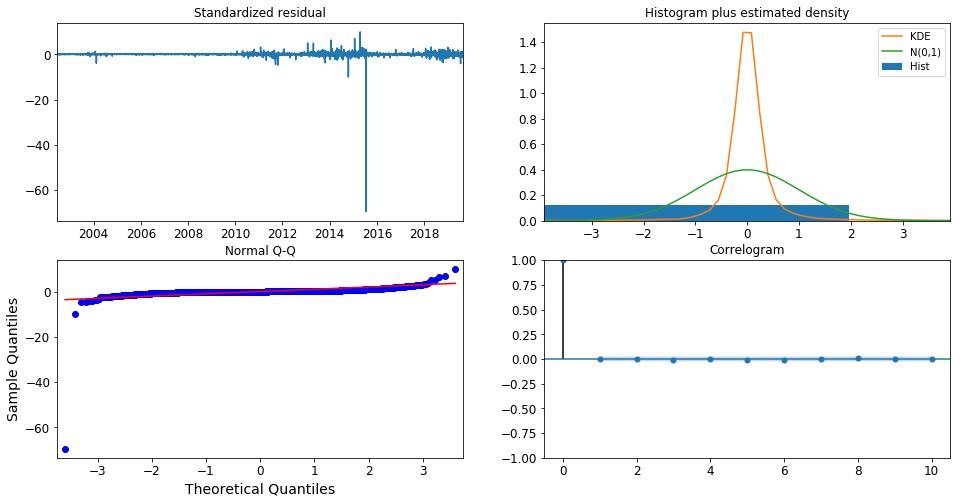

In [25]:
res.plot_diagnostics(figsize=(16, 8))
plt.show()

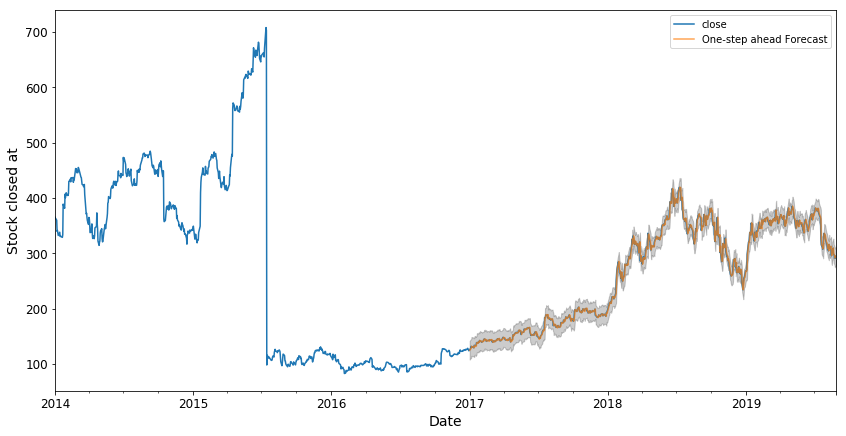

In [27]:
preds = res.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = preds.conf_int()

ax = ndata['2014':].plot(label='observed')
preds.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock closed at')
plt.legend()
plt.show()

In [28]:
res.save('ntflx_sarima.pkl')

In [30]:
import time

st = time.time()

y_pred = res.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
y_true = ndata[pd.to_datetime('2017-01-01'):]

et = time.time()

print(et-st)


0.008569002151489258


In [31]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred.predicted_mean,y_true)

28.976516465582314

In [32]:
y_pred = res.get_prediction(end=pd.to_datetime('2019-09-06'),dynamic=False)

/home/sukhad/env/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [33]:
y_pred.predicted_mean

2002-05-22      0.000000
2002-05-23     11.157015
2002-05-24     17.200800
2002-05-25     16.708446
2002-05-26     16.912491
2002-05-27     16.599603
2002-05-28     16.456642
2002-05-29     16.257822
2002-05-30     15.760883
2002-05-31     15.095735
2002-06-01     15.007738
2002-06-02     15.226770
2002-06-03     24.866715
2002-06-04     22.334354
2002-06-05     17.299523
2002-06-06     15.106286
2002-06-07     16.758120
2002-06-08     15.251842
2002-06-09     15.800926
2002-06-10     15.145174
2002-06-11     15.821497
2002-06-12     16.156473
2002-06-13     15.593288
2002-06-14     15.364020
2002-06-15     14.082630
2002-06-16     14.013786
2002-06-17     13.819870
2002-06-18     12.874257
2002-06-19     12.360794
2002-06-20     13.187233
                 ...    
2019-08-08    304.405096
2019-08-09    316.198691
2019-08-10    308.862774
2019-08-11    308.190956
2019-08-12    310.231800
2019-08-13    310.904151
2019-08-14    312.537553
2019-08-15    299.111295
2019-08-16    296.038797
